# ML LAB - 02.
# Exercise - 01.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [14]:
# get the dataframe.

df = pd.read_csv('/content/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [15]:
df.Species = df.Species.fillna(mode_species)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


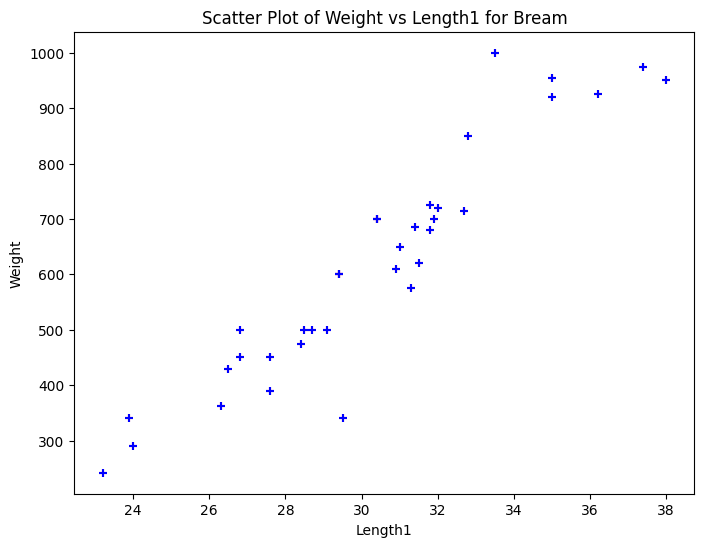

In [16]:

bream_data = df[df['Species'] == 'Bream']

plt.figure(figsize=(8, 6))
plt.scatter(bream_data['Length1'], bream_data['Weight'], marker='+', color='red')
plt.title('Scatter Plot of Weight vs Length1 for Bream')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.scatter(bream_data['Length1'], bream_data['Weight'], marker='+', color='blue')


In [25]:
df = df.dropna(subset=['Length1', 'Length2', 'Length3', 'Height', 'Width'])

In [26]:
reg = linear_model.LinearRegression()
reg.fit(df[['Length1', 'Length2', 'Length3', 'Height', 'Width']], df.Weight)

LinearRegression()

In [27]:
# prediction..

prediction = reg.predict([[25.4, 26.3, 31.0, 9.0, 4.7]])
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([372.88822695])

In [28]:
# find slope.
slope_m = reg.coef_
slope_m

array([ 62.96325756,  -6.02063699, -29.47625515,  28.07449747,
        19.53490411])

In [29]:
# intercept.
intercept_b = reg.intercept_
intercept_b

-498.7563791631269

In [31]:
# calculations.
# y = m1x1 + m2x2 + m3x3 + m4x4 + m5x5 + b
62.96325756 * 25.4 + -6.02063699 * 26.3 + -29.47625515 * 31.0 + 28.07449747 * 9.0 + 19.53490411 * 4.7 + intercept_b

372.8882269208731

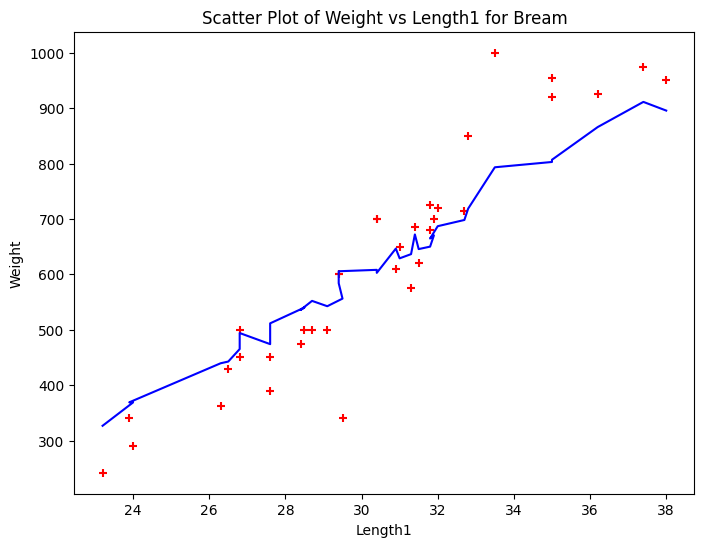

In [34]:
bream_data = df[df['Species'] == 'Bream']

plt.figure(figsize=(8, 6))
plt.scatter(bream_data['Length1'], bream_data['Weight'], marker='+', color='red')
plt.title('Scatter Plot of Weight vs Length1 for Bream')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.plot(bream_data['Length1'], reg.predict(bream_data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]), color='blue')
